# Reinforcing Data Science to Address Depression and Suicidal Ideation on Social Media

Over the past few years, we have witnessed an increase in adolescent depression, self-harm, and suicidal ideation, and with the presence and development of social media platforms it has also developed more engagement with users. Studies suggest that usage of social media is associated with depression and suicide [1](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6278213/). The growth of technology and its intersection with mental health does not only underscore a call for attention but also frames this as a public health issue.


Social media serves many different purposes, oftening functioning as a means of self-expression. However, some posts may have deeper implications which potentially signal significant underlying meanings that may be overlooked.


We recognize that the sentiment behind the posts may not always be apparent and we approach this idea with empathy. Our intention is to offer support and assistance by implementing sentiment analysis and natural language processing on user tweets in order to identify possible posts that may indicate more serious meaning. Through this approach we aim to develop effective ways in creating a supportive online environment and offer resources to those who may need it.



# The Data

The first dataset we use is data collected using Twitter API. The Tweets has been filtered to keep only the English context. It targets mental health classification of the user at Tweet-level. Secondly, we use data which comes from a university statistics course. A link to both data sources can be found in the citations at the bottom of this notebook.

In [ ]:
import pandas as pd
from transformers import pipeline
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
suicide_data = pd.read_csv('Suicide_Ideation_Dataset(Twitter-based).csv').dropna()
depression_data = pd.read_csv('Mental-Health-Twitter.csv.zip').dropna()
social_media_data = pd.read_csv('smmh.csv').dropna()
depression_data.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
original_data = pd.read_csv('Mental-Health-Twitter.csv.zip')

In [ ]:
origData = pd.DataFrame(depression_data)

In [ ]:
pd.DataFrame(depression_data).head()

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [ ]:
pd.DataFrame(suicide_data).head()

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post


In [ ]:
social_media_data.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


## Data Visualizations

### Correlation of Social Media Usage & Mental Health Indicators

In [ ]:
social_media_data.rename(columns={
    '8. What is the average time you spend on social media every day?': 'Time_Spent_on_Social_Media',
    '18. How often do you feel depressed or down?': 'Depression_Level',
    '13. On a scale of 1 to 5, how much are you bothered by worries?': 'Anxiety_Level',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?': 'Sleep_Quality',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?': 'Self_Esteem_Level'
}, inplace=True)

def map_time_to_numeric(time_str):
    if time_str == 'Less than an Hour':
        return 0.5
    elif time_str == 'Between 1 and 2 hours':
        return 1.5
    elif time_str == 'Between 2 and 3 hours':
        return 2.5
    elif time_str == 'Between 3 and 4 hours':
        return 3.5
    elif time_str == 'More than 5 hours':
        return 5.5
    else:
        return None

social_media_data['Time_Spent_on_Social_Media'] = social_media_data['Time_Spent_on_Social_Media'].apply(map_time_to_numeric)

The heatmap below reveals the correlation between time spent on social media and various mental health indicators such as depression level, anxiety level, sleep quality, and self-esteem level. Notably, the visualization highlights a significant relationship between increased social media usage and various mental health challenges. This correlation suggests that prolonged engagement with social media platforms could be a contributing factor to mental health issues among adolescents. Understanding these patterns is crucial for developing targeted interventions and support systems to mitigate the adverse effects of social media on mental health.

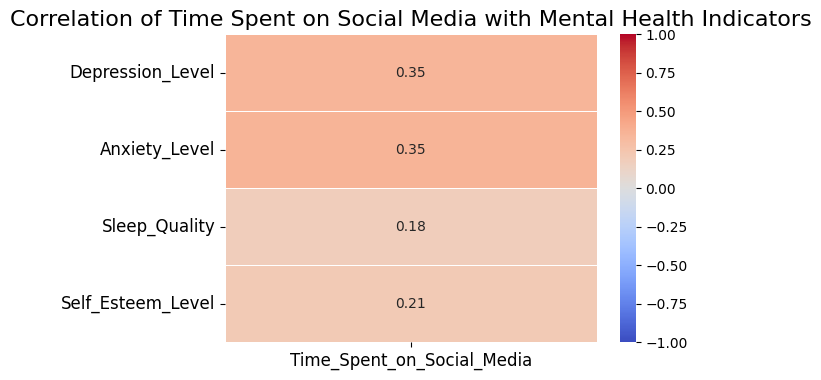

In [ ]:
columns = ['Time_Spent_on_Social_Media', 'Depression_Level', 'Anxiety_Level', 'Sleep_Quality', 'Self_Esteem_Level']
correlation_data = social_media_data[columns]

corr = correlation_data.corr()

focused_corr = corr[['Time_Spent_on_Social_Media']].drop('Time_Spent_on_Social_Media')

plt.figure(figsize=(6, 4))
sns.heatmap(focused_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

plt.title('Correlation of Time Spent on Social Media with Mental Health Indicators', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)

plt.show()

Similar to the heatmap, these bar charts further detail the relationship between social media usage and mental health. They provide a comparative view of average depression and anxiety levels in relation to the hours spent on social media. The levels were rated on a scale of 1-5 in the original dataset. They display a clear trend that mirrors our earlier findings: as time spent on social media increases, so do average levels of depression and anxiety. This reinforces the need for mindful social media use and the importance of integrating digital wellness practices into our daily lives.

<img src="Depression.png" alt="Depression Data Visualization" width="400" style="display:inline-block;"/> <img src="Anxiety.png" alt="Anxiety Data Visualization" width="400" style="display:inline-block;"/>

### Exploring the Language of Mental Health on Social Media

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

suicide_data['Tweet'] = suicide_data['Tweet'].apply(remove_urls)
depression_data['post_text'] = depression_data['post_text'].apply(remove_urls)

These word clouds offer a visual representation of the most frequently used words in posts classified as 'Depressed' versus 'Not Depressed', and 'Potential Suicide Ideation' versus 'Little Risk of Suicidal Ideation'. The stark contrast in the language used in these different categories sheds light on the emotional states and thought patterns of individuals expressing these sentiments. This analysis can be instrumental in developing AI-driven tools for the early detection of mental health issues on social media platforms. By identifying key terms and phrases associated with depression and suicidal ideation, we can better understand and support individuals who may be at risk.

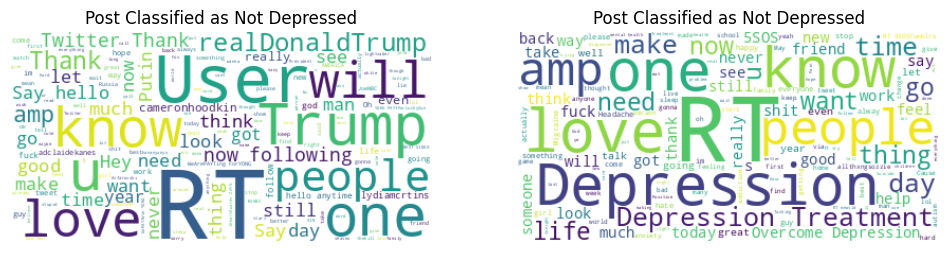

In [ ]:
# Word cloud for Not Depressed posts
not_depression_text = " ".join(post for post in depression_data[depression_data['label'] == 0]['post_text'])
wordcloud_not_depressed = WordCloud(background_color="white").generate(not_depression_text)

# Word cloud for Depressed posts
depression_text = " ".join(post for post in depression_data[depression_data['label'] == 1]['post_text'])
wordcloud_depressed = WordCloud(background_color="white").generate(depression_text)

# Display the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_not_depressed, interpolation='bilinear')
plt.title('Post Classified as Not Depressed')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_depressed, interpolation='bilinear')
plt.title('Post Classified as Not Depressed')
plt.axis('off')

plt.show()

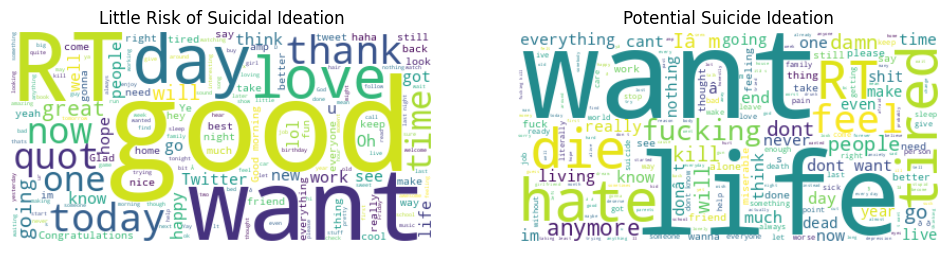

In [ ]:
# Word cloud for Not Suicide posts
text_not_suicide = " ".join(tweet for tweet in suicide_data[suicide_data['Suicide'] == 'Not Suicide post']['Tweet'])
wordcloud_not_suicide = WordCloud(background_color="white").generate(text_not_suicide)

# Word cloud for Potential Suicide posts
text_potential_suicide = " ".join(tweet for tweet in suicide_data[suicide_data['Suicide'] != 'Not Suicide post']['Tweet'])

wordcloud_potential_suicide = WordCloud(background_color="white").generate(text_potential_suicide)

# Display the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_not_suicide, interpolation='bilinear')
plt.title('Little Risk of Suicidal Ideation')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_potential_suicide, interpolation='bilinear')
plt.title('Potential Suicide Ideation')
plt.axis('off')

plt.show()

# **Feature Engineering**

In [ ]:
# convert hour of day into minutes into day
origData['post_created'] = pd.to_datetime(origData['post_created'], format='%a %b %d %H:%M:%S +0000 %Y')

# Extract the time and convert it to the hour of the day
origData['hour_of_day'] = origData['post_created'].dt.strftime('%H:%M')

origData['hour_of_day']

# Split 'hour_of_day' into hours and minutes
hours, minutes = zip(*origData['hour_of_day'].str.split(':'))

# Convert hours and minutes to integers
hours = pd.to_numeric(hours)
minutes = pd.to_numeric(minutes)

# Calculate total minutes into the day
origData['minutes_into_day'] = hours * 60 + minutes

In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
sample = origData.head(500)

In [ ]:
# This function will determine if the tweet is positive or negative (not necessarily depressed since someone could post something negative but is doung fine)
# Just a helpful feature to have
# This function also spits out a score to see how positive or negative a tweet is
def checkSentiment(text):
    result = sentiment_pipeline(text)
    result = result[0]
    label = result['label']
    score = result['score']
    if label.lower() == 'negative':
        score = -score

    if label.lower() == 'positive':
      label = 1
    else:
      label = 0

    return label, score

# Apply function to the tweet
sample['Sentiment'], sample['S_Score'] = zip(*sample['post_text'].apply(checkSentiment))

/tmp/ipykernel_104/1263839708.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Sentiment'], sample['S_Score'] = zip(*sample['post_text'].apply(checkSentiment))


In [ ]:
sentiment = sample[['post_text', 'Sentiment', 'S_Score', 'label']]
pd.set_option('display.max_colwidth', None)
sentiment
# sentiment score did not really have a significant association with whether it was related to suicidal ideation

,post_text,Sentiment,S_Score,label
0,It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since.,1,0.944766,1
1,"It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14...",0,-0.998901,1
2,Awake but tired. I need to sleep but my brain has other ideas...,0,-0.997112,1
3,RT @SewHQ: #Retro bears make perfect gifts and are great for beginners too! Get stitching with October's Sew on sale NOW! #yay,1,0.999166,1
4,It’s hard to say whether packing lists are making life easier or just reinforcing how much still needs doing... #movinghouse #anxiety,0,-0.999382,1
...,...,...,...,...
495,#Borderline personality disorder and wounding?,0,-0.992194,1
496,Access to mental health varies from state to state? #mentalhealth,0,-0.548037,1
497,"Young, black and depressed?",0,-0.999057,1
498,The myth of #addiction,0,-0.952408,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer


# Our attempt at a solution: Create a model which can detect suicidal ideation.

### 1) Processing the data using NLP

We leverage multiple NLP techniques in order to process tweets. Firstly, we process the text using regular expression to remove non-important characters. 

Next, we use TF-IDF Vectorizer which is a numerical statistic for ranking importance of words in a text. This works by increases proportionally with the number of times a word appears in the document, but is offset by the frequency of the word in the corpus, which helps to control for the fact that some words are more common than others. 

We combine these with the GloVe 6B model, which is a word embedding model that uses global co-occurrence statistics from a 6 billion word corpus to encode word meanings and relationships in a dense vector space. 

In [ ]:
class text_preprocess(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, text):
        text = re.sub('[^a-zA-Z]', ' ', text)
        text = word_tokenize(text.lower())
        text = [PorterStemmer().stem(word) for word in text if not word in set(stopwords.words('english'))]
        text = ' '.join(text)
        return text

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
--2023-11-12 20:01:34--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-11-12 20:01:34--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-11-12 20:01:35--  https://downloads.cs.stanford.edu

In [ ]:
tweets = pd.read_csv('Mental-Health-Twitter.csv.zip')
tweets

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0


In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(tweets['post_text'])

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.word2vec'

glove2word2vec(glove_input_file, word2vec_output_file)

model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

/tmp/ipykernel_104/253095223.py:7: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


In [ ]:
import numpy as np
doc_vectors = []
feature_names = tfidf_vectorizer.get_feature_names_out()
for doc in range(tfidf_matrix.shape[0]):
    feature_index = tfidf_matrix[doc,:].nonzero()[1]
    tfidf_scores = zip([feature_names[i] for i in feature_index], [tfidf_matrix[doc, x] for x in feature_index])

    weighted_vec = np.zeros(model.vector_size)
    for word, score in tfidf_scores:
        if word in model:
            weighted_vec += model[word] * score
    doc_vectors.append(weighted_vec)

## 2) Training the models

We Create two models in order to compare their accuracies.

Initially, we employ TensorFlow and Keras in conjunction with Random Search Cross-Validation to enhance our model's precision. For the second model, we utilize XGBoost paired with GridSearch Cross-Validation. Both methodologies are applied with the unified objective of accurately classifying tweets that exhibit signs of suicidal ideation.

In [ ]:
from sklearn.model_selection import train_test_split
labels = tweets['label']
X_train, X_test, y_train, y_test = train_test_split(doc_vectors, labels, test_size=0.2, random_state=42)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
def create_model(neurons=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_dim=len(doc_vectors[0])))
    model.add(Dense(neurons // 2, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {
    'neurons': [32, 64, 128],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'sgd'],
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 30]
}


random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3)

random_search.fit(X_train, y_train)

print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))

/tmp/ipykernel_104/1480052879.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)
Best: 0.723062 using {'optimizer': 'adam', 'neurons': 128, 'epochs': 20, 'batch_size': 128, 'activation': 'tanh'}


In [ ]:
best_model = random_search.best_estimator_.model
best_model.save('my_best_model.h5')  # saves to an HDF5 file


In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2]
}


In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)
grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.7s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.7s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.7s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300; total time=   1.7s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300; total time=   1.7s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300; total time=   1.7s
[CV] END gamma=0, learning_rate=0.01, max_depth=4, n_estimators=100; total time=   1.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=4, n_estim

In [ ]:
best_xgboost_model = grid_search.best_estimator_
best_xgboost_model.save_model('best_xgboost_model.json')

## Here is a visualization of the XG classifier model's performance:

125/125 [==============================] - 0s 779us/step


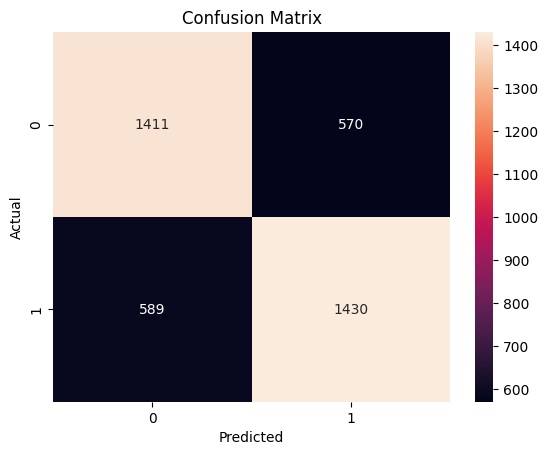

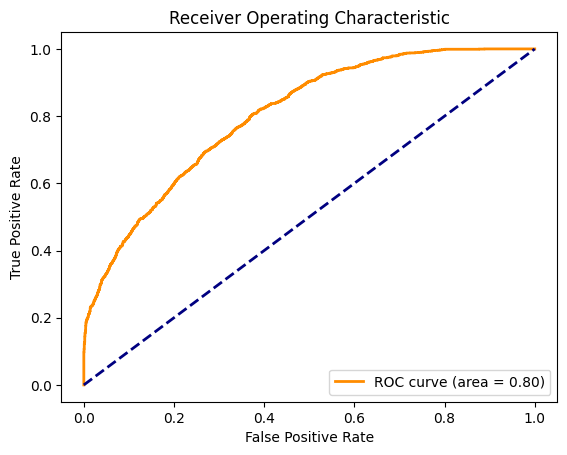

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1981
           1       0.71      0.71      0.71      2019

    accuracy                           0.71      4000
   macro avg       0.71      0.71      0.71      4000
weighted avg       0.71      0.71      0.71      4000



In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
y_pred_xgb = best_xgboost_model.predict(X_test)

y_pred_prob_keras = best_model.predict(X_test)
y_pred_keras = (y_pred_prob_keras > 0.5).astype("int32")
def visualize_performance(y_pred, y_pred_proba, y_test):
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # ROC Curve
    # Adjust for single-column or multi-column probability outputs
    if y_pred_proba.ndim > 1 and y_pred_proba.shape[1] > 1:
        y_pred_proba = y_pred_proba[:, 1]  # Use the probability of the positive class for multi-class
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Classification Report
    print(classification_report(y_test, y_pred))


y_pred_proba_xgb = best_xgboost_model.predict_proba(X_test)
visualize_performance(y_pred_xgb, y_pred_proba_xgb, y_test)



## Now, a visualization of the neural network classifier:

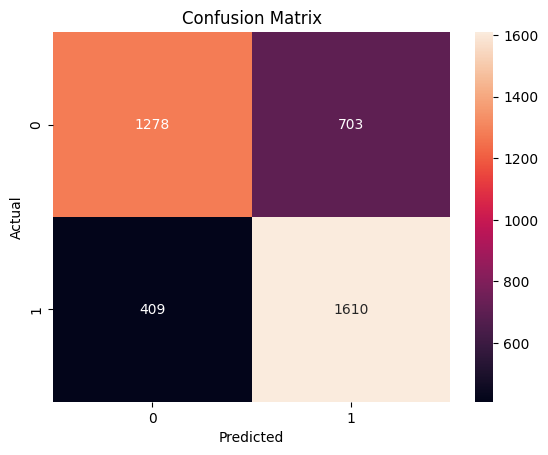

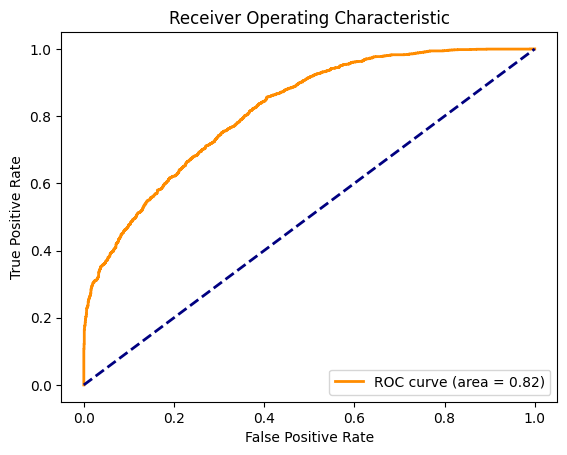

              precision    recall  f1-score   support

           0       0.76      0.65      0.70      1981
           1       0.70      0.80      0.74      2019

    accuracy                           0.72      4000
   macro avg       0.73      0.72      0.72      4000
weighted avg       0.73      0.72      0.72      4000



In [ ]:
visualize_performance(y_pred_keras, y_pred_prob_keras, y_test)

# Conclusion

After processing our data and plugging into the the neural network, our best model was able to achieve an accuracy score of 72%. This means that our model is able to predict tweets that hint deeper underlying meanings that could possible suggest depression or suicidal ideation with 72% accuracy. 

We acknowledge that despite the accuracy, texts do not completely signify an deeper underlying meaning, but we want to offer support to users as much as possible.

Citations:

Memon AM, Sharma SG, Mohite SS, Jain S. The role of online social networking on deliberate self-harm and suicidality in adolescents: A systematized review of literature. Indian J Psychiatry. 2018 Oct-Dec;60(4):384-392. doi: 10.4103/psychiatry.IndianJPsychiatry_414_17. PMID: 30581202; PMCID: PMC6278213.

Data Sources:

https://www.kaggle.com/datasets/infamouscoder/mental-health-social-media 

https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health/data 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0076c8fb-ad08-47e9-bda2-6d19837c1810' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>